### Figure 4a

/home/vincents/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/vincents/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/vincents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vincents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be 

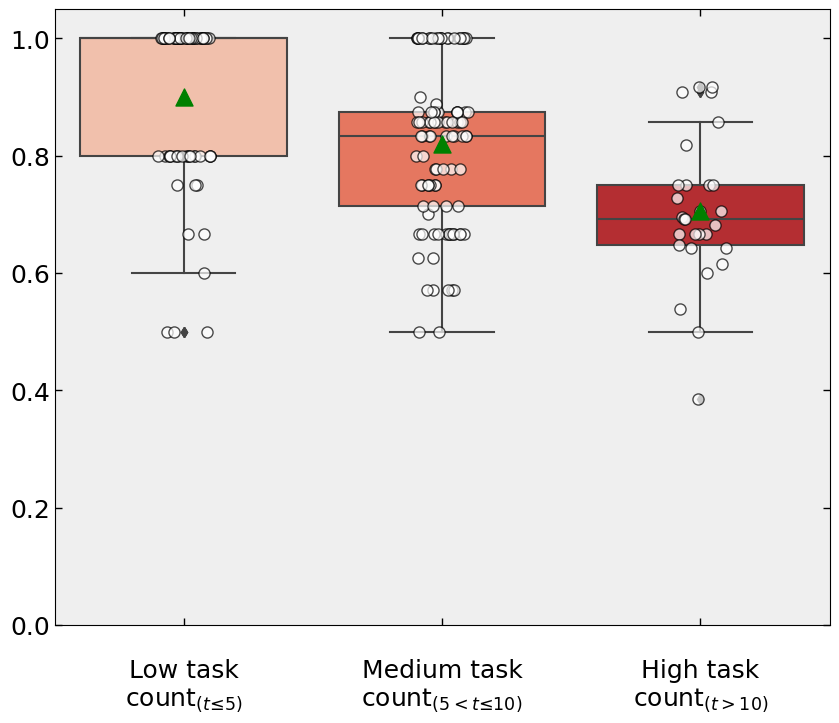

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

def plot_box_plot_ast(save=True):
    # Load dataframe
    analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

    # Define the bin edges
    bins = [0, 5, 10, 25]

    # Define the bin labels
    labels = ['\nLow task\ncount$_{(\it{t}≤5)}$', '\nMedium task\ncount$_{(5<\it{t}≤10)}$', '\nHigh task\ncount$_{(\it{t}>10)}$']

    # Create a new column 'task_count_group' with the assigned groups
    analysis_df['task_count_group'] = pd.cut(analysis_df['task_count'], bins=bins, 
                                             labels=labels, 
                                             include_lowest=True)

    # Create a boxplot
    sns.boxplot(data=analysis_df, x='task_count_group', y='RTI_rescaled', dodge=True, palette='Reds'
               )

    # Create a stripplot without legend
    stripplot = sns.stripplot(data=analysis_df, x='task_count_group', y='RTI_rescaled', dodge=True, alpha=.7, color='white', 
                              edgecolor='black', linewidth=1, size=8, legend=False)

    plt.xlabel('')
    plt.ylabel('')
    plt.ylim(0, 1.05)

    # Set the face color
    plt.gca().set_facecolor('#efefef')

    # Add inward-facing major and minor tick marks to all axes
    plt.tick_params(
        axis='both',
        which='both',
        direction='in',
        top=True,
        right=True,
        bottom=True,
        left=True,
        labelsize=18,
        width=1,
        length=5
    )

    # Calculate and plot the mean as blue triangles
    means = analysis_df.groupby('task_count_group')['RTI_rescaled'].mean()
    for i, mean in enumerate(means):
        plt.scatter(i, mean, marker='^', color='green', s=150, zorder=5)

    # Move the legend above the plot and set ncol to 1
    legend = plt.legend(title='', fontsize=14, frameon=False, ncol=1)
    
    # Increase figure size
    plt.gcf().set_size_inches(10, 8)

    # Save figure
    if save:
        plt.savefig(Path("../reports/figures/main-figures/fig4a.pdf"), dpi=1200, bbox_inches='tight')
    else:
        plt.show()

plot_box_plot_ast(save=True)

## Figure 4b

/tmp/ipykernel_5419/3622231748.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_percentage = df.groupby('RTI_bins')['transaction_value'].sum() / df['transaction_value'].sum() * 100
/tmp/ipykernel_5419/3622231748.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis_r')


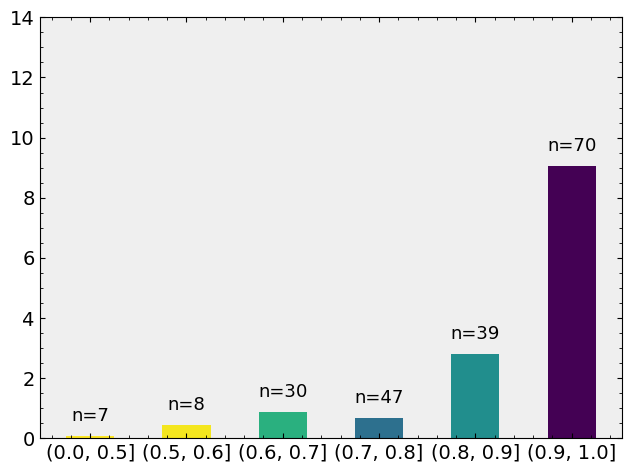

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pathlib import Path

def plot_custom_histogram(save=False):
    # Load dataframe
    data_path = Path('../data/processed/202308-services-list-w-transaction-vol-processed.xlsx')
    df = pd.read_excel(data_path)

    # Add RTI_rescaled column
    df['RTI_rescaled'] = (df['RTI'] + 1) / 2

    # Bin the RTI_rescaled column into bins
    df['RTI_bins'] = pd.cut(df['RTI_rescaled'], bins=[0, 0.5, 0.6, 0.7,0.8, 0.9, 1])

    # Calculate the percentage of transaction_value for each bin
    bin_percentage = df.groupby('RTI_bins')['transaction_value'].sum() / df['transaction_value'].sum() * 100

    # Calculate the number of services in each bin
    bin_counts = df['RTI_bins'].value_counts().sort_index()

    # Define a colormap with darker shades of blue
    cmap = plt.cm.get_cmap('viridis_r')
    norm = mcolors.Normalize(vmin=bin_counts.min(), vmax=bin_counts.max())
    colors = [cmap(norm(count)) for count in bin_counts]

    # Plot the histogram
    plt.bar(bin_percentage.index.astype(str), bin_percentage, width=0.5, color=colors)
    for x, y, count in zip(bin_percentage.index.astype(str), bin_percentage, bin_counts):
        plt.text(x, y + 0.5, f'n={int(count)}', ha='center', fontsize=13)  # Add count label above each bar
    plt.ylim(0, 14)  # Set y-axis limits
    plt.tight_layout()
    plt.xticks(rotation=0)
    plt.gca().set_facecolor('#efefef')
    plt.tick_params(axis='both', which='both', direction='in', labelsize=14)
    plt.minorticks_on()  # Enable minor ticks
    plt.grid(False)  # Turn off gridlines
    plt.tick_params(axis='y', which='both', direction='in', right=True, labelsize=14)
    plt.tick_params(axis='x', which='both', direction='in', top=True, labelsize=14)

    # Save figure
    if save:
        plt.savefig(Path("../reports/figures/main-figures/fig4b.pdf"), dpi=1200, bbox_inches='tight')
    else:
        plt.show()

# Example usage:
plot_custom_histogram(save=True)

### Figure 4c

In [70]:
analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

df = analysis_df.loc[analysis_df['rubric_score_manual'].notnull()][['service', 'task_count', 'RTI', 'rubric_score_manual', 'topic', 'organisation']].sort_values(by='rubric_score_manual')

for i in ['LP', 'MP', 'HP']: 
    print(len(df.loc[df['rubric_score_manual'] == i].organisation.unique()))
    print(df.loc[df['rubric_score_manual'] == i].topic.unique())
    print('\n')

4
['National security' 'Business and self-employed' 'Benefits'
 'Visas and immigration']


7
['Benefits' 'Working, jobs and pensions'
 'Citizenship and living in the UK' 'Business and self-employed'
 'Visas and immigration' 'Crime, justice and the law'
 'Environment and countryside']


1
['Environment and countryside']


